# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
!conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [3]:
!pip install pandas-datareader

In [4]:
!conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2022.05                  py39_0  
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  custom                   py39_1  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.6.6     

Primero importaremos datos desde un archivo con extensión `.csv`

In [5]:
import pandas as pd

In [6]:
datos=pd.read_csv('META.csv')
datos.head() # Muestra los primeros 5

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
3,2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
4,2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [7]:
datos.tail() # Muestra los últimos 5

,Date,Open,High,Low,Close,Adj Close,Volume
1266,2022-06-10,183.039993,183.100006,175.020004,175.570007,175.570007,27450800
1267,2022-06-13,170.589996,172.580002,164.029999,164.259995,164.259995,31749300
1268,2022-06-14,166.029999,166.750000,161.360001,163.729996,163.729996,27244300
1269,2022-06-15,167.199997,172.160004,163.979996,169.350006,169.350006,30008300
1270,2022-06-16,163.720001,165.080002,159.610001,160.869995,160.869995,26944100


Ahora lo haremos desde Yahoo Finance

In [10]:
import pandas_datareader.data as web

In [11]:
web.DataReader?

In [12]:
data=web.DataReader('META','yahoo','2017-06-01','2022-10-17')
data.head(10) # Muestra los primeros 10 elementos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-01,152.289993,150.300003,151.750000,151.529999,14530600,151.529999
2017-06-02,153.630005,151.300003,151.850006,153.610001,16854400,153.610001
2017-06-05,154.710007,153.410004,153.639999,153.630005,12520400,153.630005
2017-06-06,154.520004,152.479996,153.410004,152.809998,13457100,152.809998
2017-06-07,153.750000,152.339996,153.270004,153.119995,12066700,153.119995
2017-06-08,154.729996,153.100006,154.080002,154.710007,17799400,154.710007
2017-06-09,155.589996,146.610001,154.770004,149.600006,35577700,149.600006
2017-06-12,149.199997,144.559998,148.169998,148.440002,33170200,148.440002
2017-06-13,151.179993,148.899994,150.149994,150.679993,20483400,150.679993


In [13]:
# Datos importados del archivo
datos.loc[5,'Close']

154.710007

In [15]:
# Datos importados desde Yahoo
data.loc['2017-06-08','Close']

154.7100067138672

In [16]:
datos.iloc[5,4]

154.710007

In [18]:
data.iloc[5,3]

154.7100067138672

In [19]:
data.iloc[5]

High         1.547300e+02
Low          1.531000e+02
Open         1.540800e+02
Close        1.547100e+02
Volume       1.779940e+07
Adj Close    1.547100e+02
Name: 2017-06-08 00:00:00, dtype: float64

In [20]:
datos.iloc[5]

Date         2017-06-08
Open         154.080002
High         154.729996
Low          153.100006
Close        154.710007
Adj Close    154.710007
Volume         17799400
Name: 5, dtype: object

#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [21]:
def getClose(names,start,end):
    return web.DataReader(names,'yahoo',start,end)['Adj Close']

names=['META','TSLA','NFLX']
start='2020-10-16'
end='2022-10-16'

datos=getClose(names,start,end)
datos.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-16,265.929993,146.556671,530.789978
2020-10-19,261.399994,143.610001,530.719971
2020-10-20,267.559998,140.646667,525.419983
2020-10-21,278.730011,140.880005,489.049988
2020-10-22,278.119995,141.929993,485.230011


¿Cómo lucen estos datos?

<AxesSubplot:xlabel='Date'>

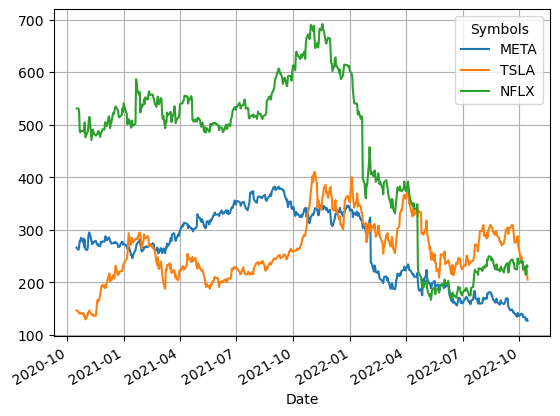

In [23]:
datos.plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [24]:
datos.mean() # Media

Symbols
META    267.830656
TSLA    260.895527
NFLX    444.054413
dtype: float64

In [25]:
datos.std() # Desviación estandar

Symbols
META     70.610501
TSLA     56.896569
NFLX    152.034498
dtype: float64

In [26]:
datos.describe()

Symbols,META,TSLA,NFLX
count,503.000000,503.000000,503.000000
mean,267.830656,260.895527,444.054413
std,70.610501,56.896569,152.034498
min,126.760002,129.346664,166.369995
25%,201.275002,222.903336,339.089996
50%,276.779999,251.213333,502.859985
75%,330.300003,296.856659,546.619995
max,382.179993,409.970001,691.690002


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [27]:
# Desplazamos los datos una casilla
datos.shift()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-16,NaN,NaN,NaN
2020-10-19,265.929993,146.556671,530.789978
2020-10-20,261.399994,143.610001,530.719971
2020-10-21,267.559998,140.646667,525.419983
2020-10-22,278.730011,140.880005,489.049988
...,...,...,...
2022-10-10,133.449997,223.070007,224.750000
2022-10-11,133.789993,222.960007,229.979996
2022-10-12,128.539993,216.500000,214.289993


In [28]:
R=(datos-datos.shift())/datos.shift()
R.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-16,NaN,NaN,NaN
2020-10-19,-0.017035,-0.020106,-0.000132
2020-10-20,0.023565,-0.020635,-0.009986
2020-10-21,0.041748,0.001659,-0.069221
2020-10-22,-0.002189,0.007453,-0.007811


In [29]:
R=R.dropna() # Elimina las filas con NaN
R.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-19,-0.017035,-0.020106,-0.000132
2020-10-20,0.023565,-0.020635,-0.009986
2020-10-21,0.041748,0.001659,-0.069221
2020-10-22,-0.002189,0.007453,-0.007811
2020-10-23,0.023983,-0.012119,0.006286


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

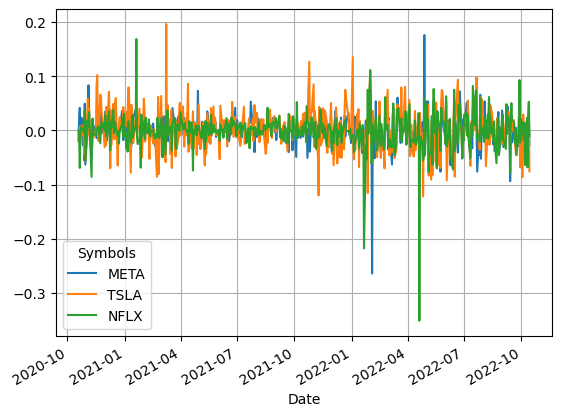

In [30]:
R.plot(grid=True)

array([[<AxesSubplot:title={'center':'META'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'NFLX'}>, <AxesSubplot:>]],
      dtype=object)

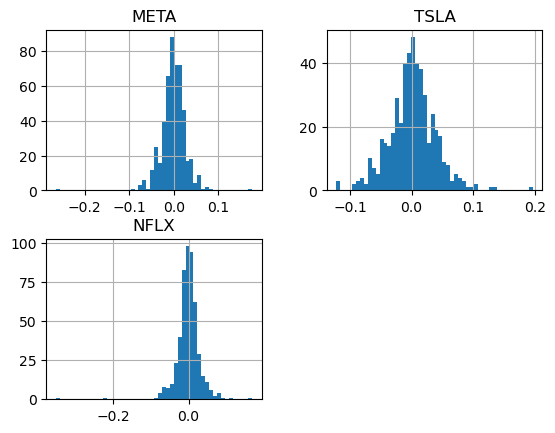

In [32]:
R.hist(bins=50)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [33]:
import numpy as np

In [34]:
r=np.log(datos/datos.shift())
r.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-16,NaN,NaN,NaN
2020-10-19,-0.017181,-0.020311,-0.000132
2020-10-20,0.023292,-0.020850,-0.010037
2020-10-21,0.040900,0.001658,-0.071733
2020-10-22,-0.002191,0.007425,-0.007842


In [35]:
r=r.dropna() # Eliminar las filas con NaN
r.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-19,-0.017181,-0.020311,-0.000132
2020-10-20,0.023292,-0.020850,-0.010037
2020-10-21,0.040900,0.001658,-0.071733
2020-10-22,-0.002191,0.007425,-0.007842
2020-10-23,0.023699,-0.012193,0.006266


<AxesSubplot:xlabel='Date'>

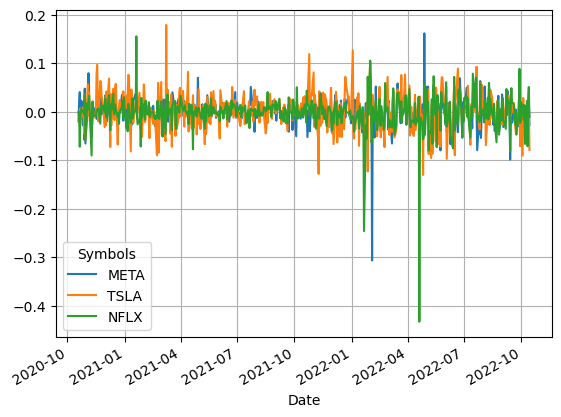

In [36]:
r.plot(grid=True)

array([[<AxesSubplot:title={'center':'META'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'NFLX'}>, <AxesSubplot:>]],
      dtype=object)

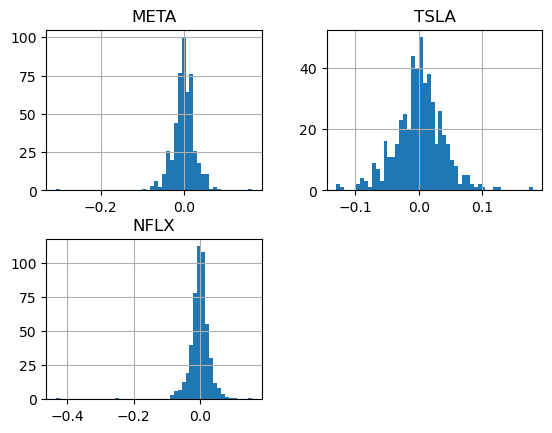

In [37]:
r.hist(bins=50)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

<AxesSubplot:xlabel='Date'>

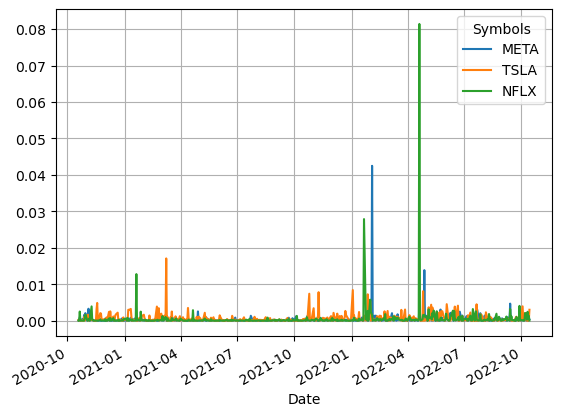

In [38]:
np.abs(R-r).plot(grid=True)

In [40]:
R=datos.pct_change().dropna()
R.head()

Symbols,META,TSLA,NFLX
Date,,,
2020-10-19,-0.017035,-0.020106,-0.000132
2020-10-20,0.023565,-0.020635,-0.009986
2020-10-21,0.041748,0.001659,-0.069221
2020-10-22,-0.002189,0.007453,-0.007811
2020-10-23,0.023983,-0.012119,0.006286


In [41]:
R.describe()

Symbols,META,TSLA,NFLX
count,502.000000,502.000000,502.000000
mean,-0.001054,0.001378,-0.001080
std,0.028570,0.037772,0.032897
min,-0.263901,-0.121841,-0.351166
25%,-0.013245,-0.020414,-0.013946
50%,-0.000861,0.001787,0.000371
75%,0.014362,0.021678,0.013267
max,0.175936,0.196412,0.168543


In [42]:
r.describe()

Symbols,META,TSLA,NFLX
count,502.000000,502.000000,502.000000
mean,-0.001476,0.000668,-0.001666
std,0.029316,0.037674,0.035014
min,-0.306391,-0.129928,-0.432578
25%,-0.013333,-0.020626,-0.014044
50%,-0.000862,0.001785,0.000371
75%,0.014260,0.021446,0.013180
max,0.162064,0.179327,0.155758


___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.